# Fashion MNIST Dataset

In [46]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,LeakyReLU,Dropout

import matplotlib.pyplot as plt

In [47]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data() #Loading the fashion mnist dataset

In [48]:
# for i in range(5):
#     plt.imshow(X_train[i])
#     plt.show()

In [49]:
#Normalization
X_train=X_train/255
X_test=X_test/255

##### If I OHE then I should use Categorical Entropy otherwise I dont have to encode and I can directly use Sparse Categorical Entropy

In [50]:
from keras.callbacks import EarlyStopping

In [51]:
# model = Sequential([
#     Flatten(input_shape=(28,28)),                

#     Dense(64),
#     LeakyReLU(alpha=0.01),
    
#     Dense(32),
#     LeakyReLU(alpha=0.01),
    
#     Dense(10, activation='softmax')   

In [52]:
model=Sequential()

model.add(Flatten(input_shape=(28,28))) #Input Layer

model.add(Dense(128,activation='relu')) #Hidden layers
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax')) #Output Layer

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [54]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)


In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=callback)       

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7033 - accuracy: 0.7471 - val_loss: 0.4387 - val_accuracy: 0.8393
Epoch 2/100
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7033 - accuracy: 0.7471 - val_loss: 0.4387 - val_accuracy: 0.8393
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4873 - accuracy: 0.8295 - val_loss: 0.4128 - val_accuracy: 0.8578
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4873 - accuracy: 0.8295 - val_loss: 0.4128 - val_accuracy: 0.8578
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4470 - accuracy: 0.8437 - val_loss: 0.3874 - val_accuracy: 0.8602
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4470 - accuracy: 0.8437 - val_loss: 0.3874 - val_accuracy: 0.8602
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4181 - accuracy: 0.8523 - val_loss: 0.3858 - val_ac

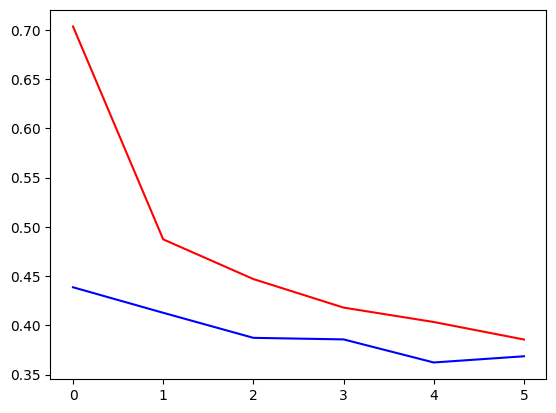

In [57]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')

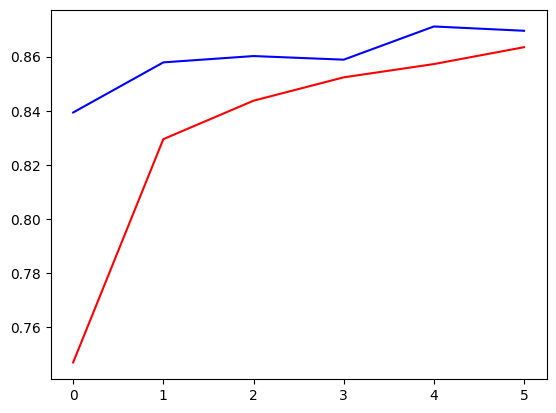

In [58]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

In [59]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [60]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [61]:
y_prob

array([[1.31289298e-05, 2.24043629e-06, 1.18917558e-06, ...,
        8.08915868e-02, 3.72455070e-05, 9.11831796e-01],
       [7.34269415e-05, 4.15316237e-07, 9.88404989e-01, ...,
        2.03953965e-10, 1.64141125e-06, 4.04374763e-11],
       [1.08597545e-13, 1.00000000e+00, 2.07818382e-16, ...,
        1.46113083e-24, 5.90484897e-19, 1.02112539e-21],
       ...,
       [1.28324248e-03, 2.63133916e-06, 1.81741361e-05, ...,
        1.92520588e-06, 9.97613907e-01, 8.62348088e-07],
       [1.66351821e-08, 9.99995232e-01, 2.36404479e-10, ...,
        8.77752545e-15, 3.40271041e-11, 4.63123517e-13],
       [1.12309335e-05, 1.12553465e-07, 3.30371677e-07, ...,
        3.08868680e-02, 1.33714813e-04, 1.08443887e-03]], dtype=float32)

In [62]:
y_pred=y_prob.argmax(axis=1)

In [63]:
y_train[101]

0

In [64]:
result=y_pred[101]

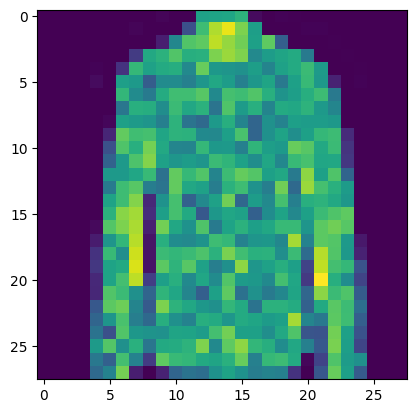

In [65]:
plt.imshow(X_test[101])

In [66]:
print(f'Your Prediction: {class_names[result]}')

Your Prediction: Shirt
